In [13]:
from IPython.display import display
import math
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

In [14]:
events_dict = {
    'BLUE: first_blood': 0,
    'BLUE: dragon': 1,
    'BLUE: herald': 2,
    'BLUE: first_tower_top': 3,
    'BLUE: first_tower_mid': 4,
    'BLUE: first_tower_bot': 5,
    'BLUE: second_tower_top': 6,
    'BLUE: second_tower_mid': 7,
    'BLUE: second_tower_bot': 8,
    'BLUE: third_tower_top': 9,
    'BLUE: third_tower_mid': 10,
    'BLUE: third_tower_bot': 11,
    'BLUE: inhibitor_top': 12,
    'BLUE: inhibitor_mid': 13,
    'BLUE: inhibitor_bot': 14,
    'BLUE: baron': 15,
    'BLUE: elder_dragon': 16,
    'BLUE: nexus_tower': 17,
    'BLUE: nexus': 18,
    'RED: first_blood': 19,
    'RED: dragon': 20,
    'RED: herald': 21,
    'RED: first_tower_top': 22,
    'RED: first_tower_mid': 23,
    'RED: first_tower_bot': 24,
    'RED: second_tower_top': 25,
    'RED: second_tower_mid': 26,
    'RED: second_tower_bot': 27,
    'RED: third_tower_top': 28,
    'RED: third_tower_mid': 29,
    'RED: third_tower_bot': 30,
    'RED: inhibitor_top': 31,
    'RED: inhibitor_mid': 32,
    'RED: inhibitor_bot': 33,
    'RED: baron': 34,
    'RED: elder_dragon': 35,
    'RED: nexus_tower': 36,
    'RED: nexus': 37
}

df = pd.read_csv('data/clean-one-line.csv')
df = df.drop('game', axis=1)
data = df.values.tolist()

for game in data:
    for i, s in enumerate(game):
        if s in events_dict:
            game[i] = events_dict.get(s)

dataArray = []

for game in data:
    dataArray += game

dataArray = [b for b in dataArray if not(isinstance(b, float))]

In [15]:
dataframe = pd.DataFrame(dataArray)
dataset = dataframe.values
dataset = dataset.astype('float32')

# vislumbrar um pedaço dos dados e formato lido
print("\n* Dimensão dos dados:", dataset.shape) 
# 36 amostras/instâncias, univariadas (um único valor real)
print("* Dados originais:")
print(dataset[:10])


* Dimensão dos dados: (6996, 1)
* Dados originais:
[[19.]
 [ 2.]
 [ 3.]
 [20.]
 [21.]
 [ 4.]
 [ 5.]
 [20.]
 [23.]
 [34.]]


In [16]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

Text(0, 0.5, 'Evento')

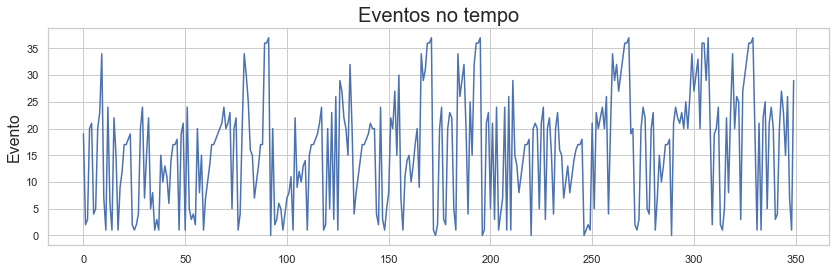

In [17]:
#plot
plt.figure(figsize=(14,4))
plt.plot(dataset[:350])
plt.title('Eventos no tempo', fontsize=20)
plt.ylabel('Evento', fontsize=16)

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


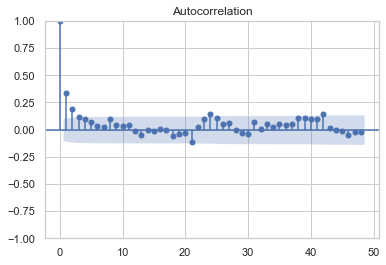

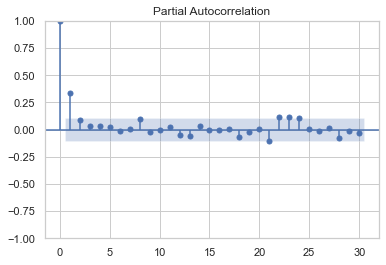

In [18]:
plot_acf(dataset[:350], lags=48);
plot_pacf(dataset[:350], lags=30);

In [19]:
arima = ARIMA(dataset, order=(12,1,1))
predictions = arima.fit().predict()

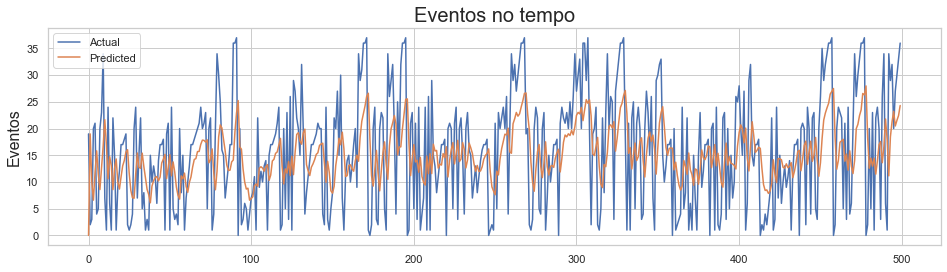

In [20]:
plt.figure(figsize=(16,4))
plt.plot(dataset[:500], label="Actual")
plt.plot(predictions[:500], label="Predicted")
plt.title('Eventos no tempo', fontsize=20)
plt.ylabel('Eventos', fontsize=16)
plt.legend()

In [21]:
from sklearn.metrics import r2_score
r2_score(dataset, predictions)

0.171812054738128

In [22]:
sarima = SARIMAX(dataset, 
                order=(1,1,1), 
                seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict()

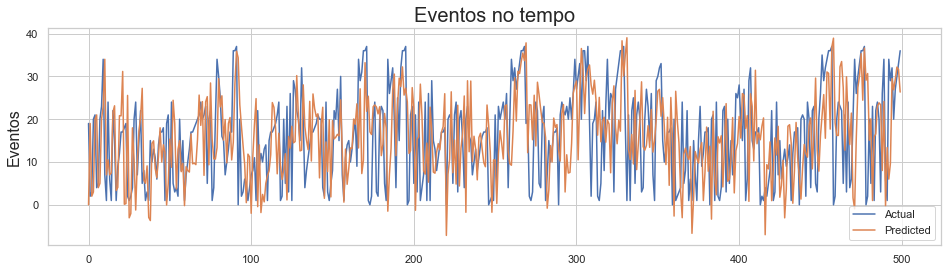

In [23]:
plt.figure(figsize=(16,4))
plt.plot(dataset[:500], label="Actual")
plt.plot(predictions[:500], label="Predicted")
plt.title('Eventos no tempo', fontsize=20)
plt.ylabel('Eventos', fontsize=16)
plt.legend()

In [24]:
from sklearn.metrics import r2_score
r2_score(dataset, predictions)

-0.30327878721462853